<a href="https://colab.research.google.com/github/Mariahasan070/366ai/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import zipfile
import os


zip_file_path = '/content/drive/MyDrive/aaa/caltech-101/101_ObjectCategories.zip'  # Path to the ZIP file
extracted_dir = '/content/drive/MyDrive/xy'  # Directory to extract the files

# Load Dataset

In [6]:
temp = '/content/drive/MyDrive/xy/101_ObjectCategories'
# Verify the extraction
print(f"Dataset extracted to: {temp}")
print("Classes found:", os.listdir(temp))

# Step 3: Use the extracted directory with ImageFolder
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = datasets.ImageFolder(root=temp, transform=transform)

# Verify the dataset
print(f"Number of images: {len(dataset)}")
print(f"Classes: {dataset.classes}")
print(f"Classes: {len(dataset.classes)}")

Dataset extracted to: /content/drive/MyDrive/xy/101_ObjectCategories
Classes found: ['accordion', 'airplanes', 'anchor', 'ant', 'BACKGROUND_Google', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'Faces', 'Faces_easy', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'Leopards', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'Motorbikes', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', '

# Split Dataset

In [7]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_data, val_data, test_data = random_split(dataset, [train_size, val_size, test_size])


#Data Loaders

In [8]:
from torch.utils.data import DataLoader

# Create DataLoaders for the splits
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Verify the DataLoaders are created
print(f"Train loader: {len(train_loader)} batches")
print(f"Validation loader: {len(val_loader)} batches")
print(f"Test loader: {len(test_loader)} batches")


Train loader: 229 batches
Validation loader: 29 batches
Test loader: 29 batches


#Using Pre-trained Models

# VGG19 Model

In [9]:
import torch.nn as nn
from torchvision.models import vgg19

# Load the pre-trained VGG19 model
model = vgg19(pretrained=True)

# Adjust the final fully connected layer to match the number of classes (101)
model.classifier[6] = nn.Linear(4096, 101)

# Verify the model
print(model)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:06<00:00, 83.1MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

#ResNet50 Model

In [10]:
from torchvision.models import resnet50

# Load the pre-trained ResNet50 model
model = resnet50(pretrained=True)

# Verify the model architecture
print(model)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 92.0MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

#

In [11]:
import torch.nn as nn
from torchvision.models import resnet50

# Load the pre-trained ResNet50 model
model = resnet50(pretrained=True)

# Modify the final fully connected layer to match the number of classes (101)
model.fc = nn.Linear(2048, 101)

# Verify the model architecture
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# EfficientNet (EfficientNet-B0)

In [12]:
import torch.nn as nn
from torchvision.models import efficientnet_b0

# Load the pre-trained EfficientNet-B0 model
model = efficientnet_b0(pretrained=True)

# Modify the final fully connected layer to match the number of classes (101)
model.classifier[1] = nn.Linear(1280, 101)

# Verify the model
print(model)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 83.1MB/s]


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

# Training the Model

# Define Loss and Optimizer

In [18]:
import torch.optim as optim
import torch.nn as nn

# Loss function (CrossEntropyLoss for classification)
criterion = nn.CrossEntropyLoss()

# Optimizer (Adam optimizer with learning rate of 0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Train the Model

In [14]:
num_classes = len(dataset.classes)
print(f"Number of classes: {num_classes}")


Number of classes: 102


In [15]:
import torch.nn as nn

# Assuming `model` is an EfficientNet instance
# Update the classifier layer
num_classes = len(dataset.classes)  # Ensure this is the correct number of classes
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

print(f"Model's final layer updated to have {num_classes} output neurons.")



Model's final layer updated to have 102 output neurons.


In [19]:
# Number of epochs for training
num_epochs = 5

for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()

    # Loop through the training data
    for images, labels in train_loader:
        # Zero the gradients from the previous step
        optimizer.zero_grad()

        # Forward pass: Get model predictions
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass: Compute gradients
        loss.backward()

        # Optimizer step: Update model weights
        optimizer.step()

    # Optionally, print the loss at the end of each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/5], Loss: 1.6701
Epoch [2/5], Loss: 1.0125
Epoch [3/5], Loss: 1.0495
Epoch [4/5], Loss: 0.8226
Epoch [5/5], Loss: 1.0282


#Validate the Model

In [20]:
import torch
# Set the model to evaluation mode
model.eval()

# Disable gradient computation for validation (to save memory and computation)
with torch.no_grad():
    # Loop through the validation data
    for images, labels in val_loader:
        # Forward pass: Get model predictions
        outputs = model(images)

        # Compute validation metrics (e.g., accuracy, loss)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        correct = (predicted == labels).sum().item()  # Count correct predictions
        total = labels.size(0)  # Total number of samples in the batch
        accuracy = correct / total  # Accuracy for this batch

        # Optionally, print or store the metrics
        print(f"Batch Accuracy: {accuracy * 100:.2f}%")


Batch Accuracy: 59.38%
Batch Accuracy: 68.75%
Batch Accuracy: 81.25%
Batch Accuracy: 87.50%
Batch Accuracy: 78.12%
Batch Accuracy: 87.50%
Batch Accuracy: 81.25%
Batch Accuracy: 75.00%
Batch Accuracy: 81.25%
Batch Accuracy: 81.25%
Batch Accuracy: 87.50%
Batch Accuracy: 62.50%
Batch Accuracy: 78.12%
Batch Accuracy: 84.38%
Batch Accuracy: 78.12%
Batch Accuracy: 87.50%
Batch Accuracy: 71.88%
Batch Accuracy: 87.50%
Batch Accuracy: 84.38%
Batch Accuracy: 78.12%
Batch Accuracy: 71.88%
Batch Accuracy: 81.25%
Batch Accuracy: 78.12%
Batch Accuracy: 84.38%
Batch Accuracy: 68.75%
Batch Accuracy: 75.00%
Batch Accuracy: 81.25%
Batch Accuracy: 81.25%
Batch Accuracy: 88.89%


# Parameter Tuning with Grid Search

#Evaluating the Model

# Evaluate on Test Data

In [21]:
model.eval()  # Set the model to evaluation mode

# Disable gradient computation for test (to save memory and computation)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        # Forward pass: Get model predictions
        outputs = model(images)

        # Get predicted class (highest probability)
        _, predicted = torch.max(outputs, 1)

        # Count correct predictions
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Compute accuracy
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 79.89%


# Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Lists to store the true labels and predictions
y_pred = []
y_true = []

# Set the model to evaluation mode and disable gradients
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass: Get model predictions
        outputs = model(images)

        # Get predicted class (the one with the highest score)
        _, preds = torch.max(outputs, 1)

        # Append predictions and true labels to the lists
        y_pred.extend(preds.cpu().numpy())  # Ensure predictions are on the CPU
        y_true.extend(labels.cpu().numpy())  # Ensure labels are on the CPU

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[30  0  0 ...  0  0  0]
 [ 0 53  0 ...  0  0  0]
 [ 0  0 40 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 1  0  0 ...  0  0  6]]


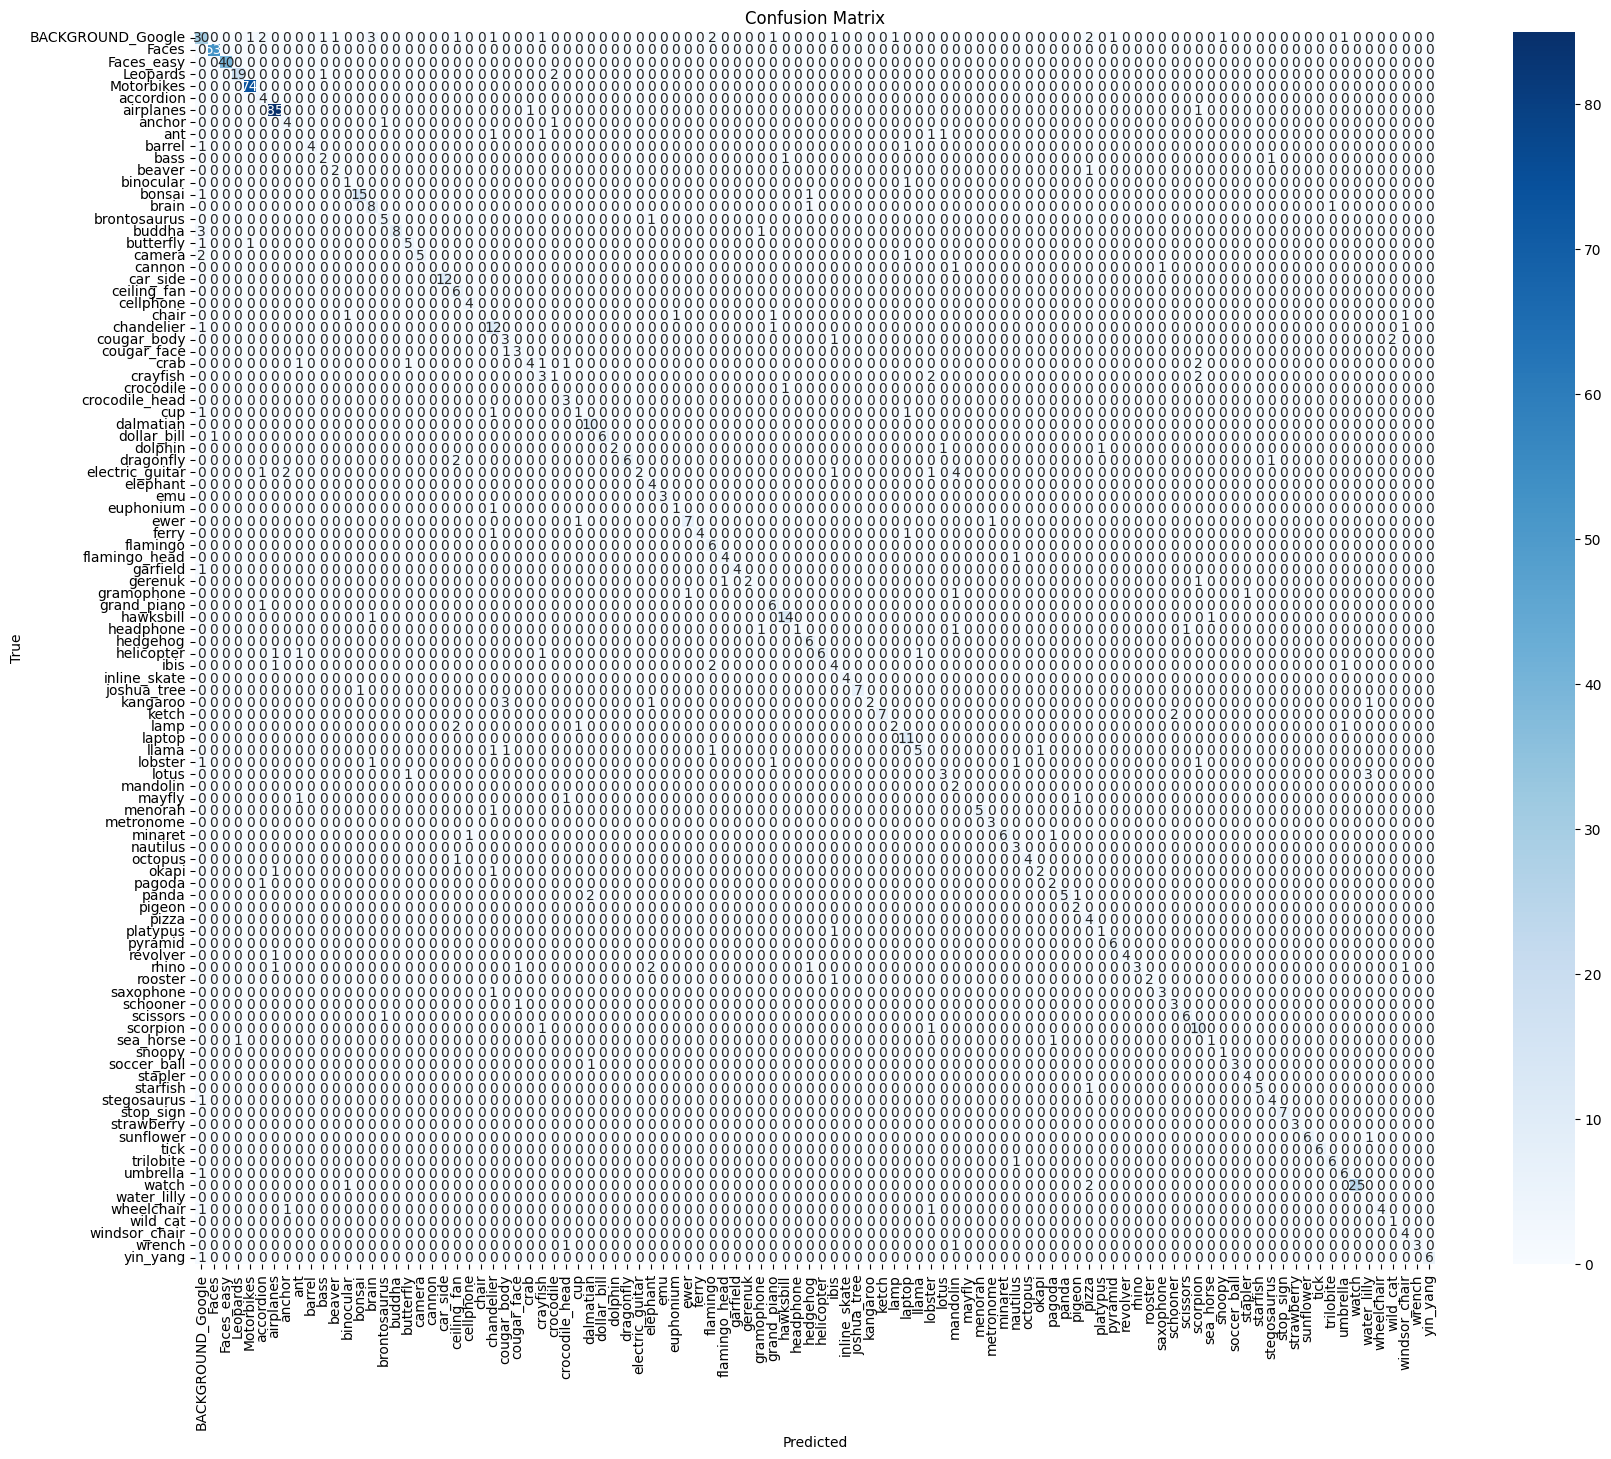

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot confusion matrix using seaborn
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [27]:
all_labels = []
for _, labels in train_loader:
    all_labels.extend(labels.numpy())  # Assuming labels are tensors
unique_classes = set(all_labels)
print(f"Number of classes: {len(unique_classes)}")
print(f"Classes: {unique_classes}")


Number of classes: 102
Classes: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101}


# Classification Report

In [29]:
from sklearn.metrics import classification_report

# Assuming 'class_names' contains the list of class labels (e.g., class names in your dataset)
class_names = ['class_0', 'class_1', 'class_2', ..., 'class_100']  # Replace with actual class names

# Print the classification report
print(classification_report(y_true, y_pred, target_names=dataset.classes))


                   precision    recall  f1-score   support

BACKGROUND_Google       0.65      0.59      0.62        51
            Faces       0.98      1.00      0.99        53
       Faces_easy       1.00      1.00      1.00        40
         Leopards       0.95      0.86      0.90        22
       Motorbikes       0.97      1.00      0.99        74
        accordion       0.44      1.00      0.62         4
        airplanes       0.94      0.98      0.96        87
           anchor       0.57      0.67      0.62         6
              ant       0.00      0.00      0.00         4
           barrel       1.00      0.67      0.80         6
             bass       0.50      0.50      0.50         4
           beaver       0.67      0.67      0.67         3
        binocular       0.33      0.50      0.40         2
           bonsai       0.94      0.88      0.91        17
            brain       0.62      0.80      0.70        10
     brontosaurus       0.71      0.83      0.77       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

# Top-k Accuracy

In [30]:
import torch

def top_k_accuracy(output, target, k=5):
    # Disable gradient calculation for efficiency
    with torch.no_grad():
        # Get the top k predictions for each sample in the batch
        max_k_preds = torch.topk(output, k, dim=1).indices

        # Check if the true label is among the top k predictions
        correct = max_k_preds.eq(target.view(-1, 1).expand_as(max_k_preds))

        # Calculate the accuracy: the fraction of samples where the true label is in the top k predictions
        return correct.any(dim=1).float().mean().item()


# Per-Class Accuracy

#t-SNE Visualization

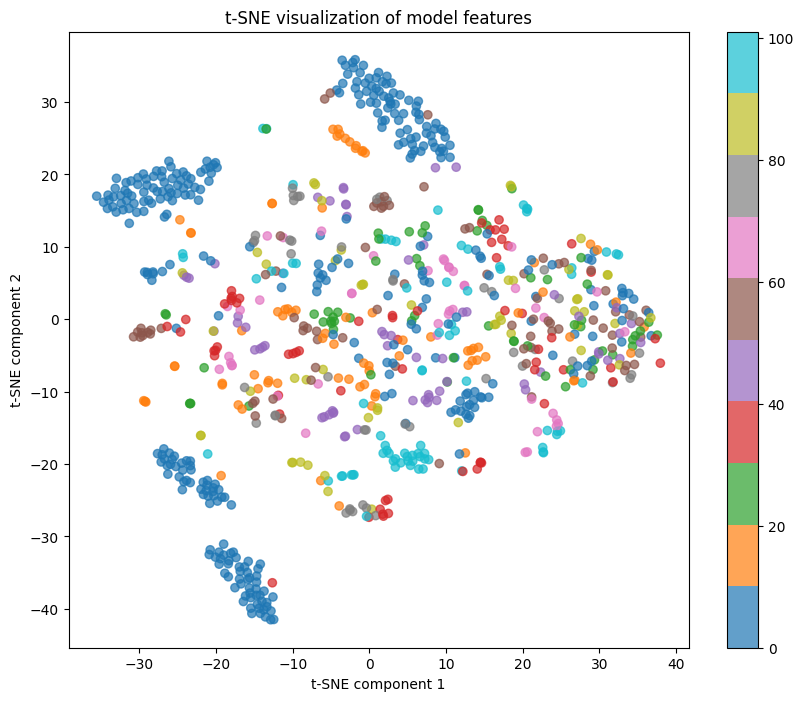

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch

# List to store features and labels
features = []
labels_list = []

# Set model to evaluation mode
model.eval()

# Extract features (before the final layer) and labels
with torch.no_grad():
    for images, labels in test_loader:
        # Forward pass to get the output from the model (before the final classification layer)
        output = model(images)

        # If you want features from a specific layer (e.g., the penultimate layer):
        # For example, using a feature extractor:
        # features.append(model.layer_name(images))
        features.append(output)  # Assuming output is the feature embedding
        labels_list.append(labels)

# Concatenate features and labels to numpy arrays
features = torch.cat(features).numpy()  # Combine all features into one array
labels_list = torch.cat(labels_list).numpy()  # Combine all labels into one array

# Apply t-SNE to reduce features to 2D space
tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(features)

# Plot the 2D features using a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_list, cmap='tab10', alpha=0.7)
plt.colorbar()  # Show color bar with label information
plt.title('t-SNE visualization of model features')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()


# Explainable AI (XAI) with Grad-CAM

In [32]:
pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39648 sha256=e9aa6291c9ca21f82df7f60c3809dfe0f02b368c34682fa167d33b2fc1577dd5
  Stored in directory: /root/.cache/pip/wheels/8b/0d/d2/b12bec1ccc028921fb98158042ade2d19dae73925dfc636954
Successfully built grad-cam


# Apply Grad-CAM

In [48]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image

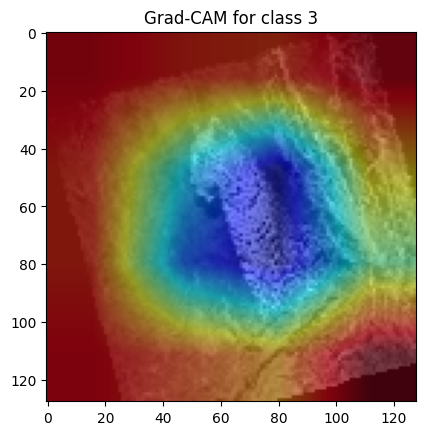

In [51]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
import torch
import matplotlib.pyplot as plt
import numpy as np

# Check if CUDA (GPU) is available; otherwise, use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the selected device
model = model.to(device)

# Set the model to evaluation mode
model.eval()

# Select the target layer for EfficientNet
target_layers = [model.features[-1]]  # Use a list for target layers

# Initialize GradCAM without 'use_cuda' argument
cam = GradCAM(model=model, target_layers=target_layers)

# Example of processing one batch from the test loader
for images, labels in test_loader:
    # Move images and labels to the correct device (GPU or CPU)
    images = images.to(device)
    labels = labels.to(device)

    # Run GradCAM for the first image and target class
    targets = [ClassifierOutputTarget(labels[0].item())]  # Wrap the label in ClassifierOutputTarget
    grayscale_cam = cam(input_tensor=images, targets=targets)

    # Convert the image from (C, H, W) to (H, W, C) and normalize to [0, 1]
    image = images[0].cpu().permute(1, 2, 0).numpy()
    image = (image - image.min()) / (image.max() - image.min())
    image = image.astype(np.float32)

    # Apply the GradCAM mask
    cam_image = show_cam_on_image(image, grayscale_cam[0])

    # Show the image with the GradCAM overlay
    plt.imshow(cam_image)
    plt.title(f"Grad-CAM for class {labels[0].item()}")
    plt.show()

    break  # Only show for one batch; remove this line to process the entire test set
